In [1]:
# to access functions from root directory 
import sys
sys.path.append('/data/ad181/RemoteDir/multilevel_ppo')

In [2]:
%matplotlib notebook

import numpy as np
import pickle
import matplotlib.pyplot as plt
from copy import deepcopy
import os

from utils.plot_functions import plot_s_snapshots
from utils.env_evaluate_functions import eval_actions

In [3]:
seed=1
case = 'case_1'
opt_dir = './'+case
img_dir = './opt_images'

with open('../envs_params/env_data_v1/env_train_dict.pkl', 'rb') as input:
    envs = pickle.load(input)
rl_indices = list(range(16))
os.makedirs(img_dir, exist_ok=True)

In [4]:
fine_env = envs[5]
k_list = fine_env.ressim_params.k_list
envs = []
for k in k_list:
    env_ = deepcopy(fine_env)
    env_.set_k(np.array([k]))
    envs.append(env_)

/data/ad181/RemoteDir/multilevel_ppo/stable_baselines_mlppo/stable_baselines3/common/envs/multi_level_model/level_mapping_functions.py:51: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  for j in range(len(p_1)-1):


<IPython.core.display.Javascript object>


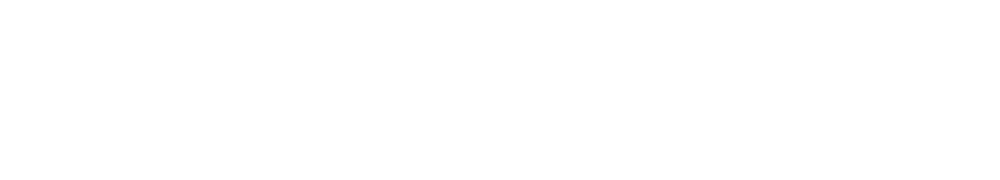

<IPython.core.display.Javascript object>


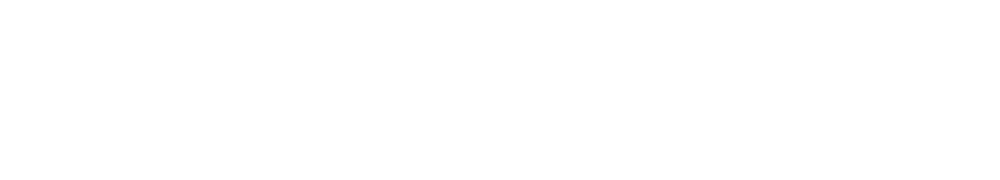

base: 0.5738880382180872
optimum: 0.67527921204685
% improvement: 17


<IPython.core.display.Javascript object>


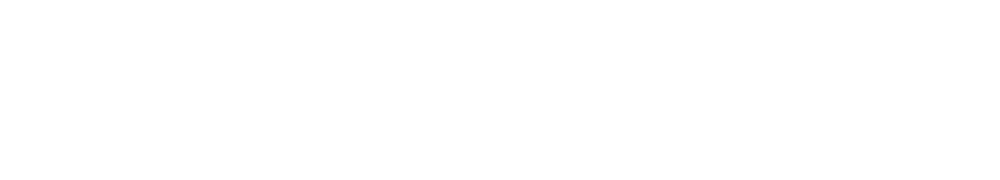

<IPython.core.display.Javascript object>


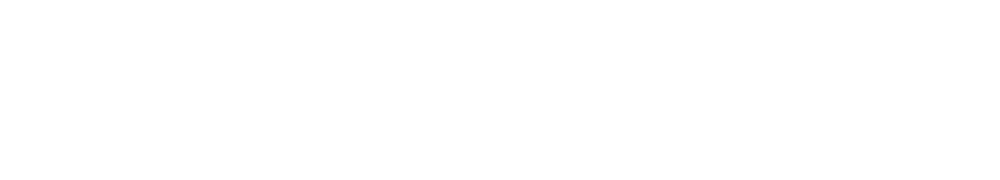

base: 0.5661196614861788
optimum: 0.6706476350875261
% improvement: 18


<IPython.core.display.Javascript object>


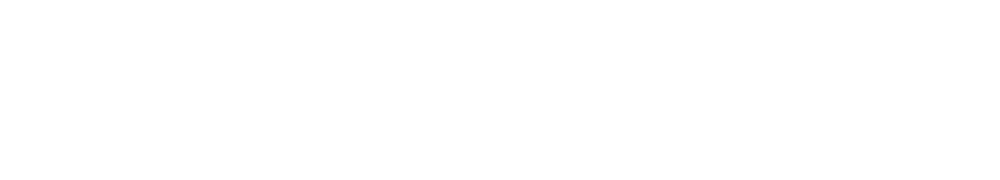

<IPython.core.display.Javascript object>


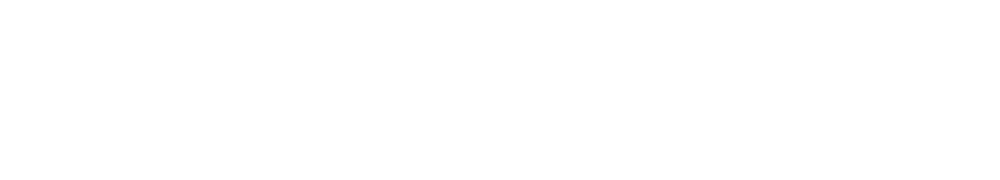

base: 0.5674567086344899
optimum: 0.6694053296831469
% improvement: 17


<IPython.core.display.Javascript object>


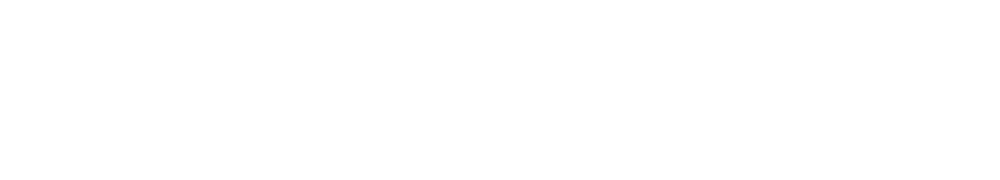

<IPython.core.display.Javascript object>


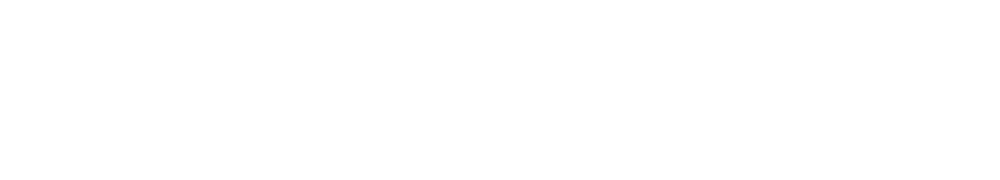

base: 0.5615048853426314
optimum: 0.667003284700145
% improvement: 18


<IPython.core.display.Javascript object>


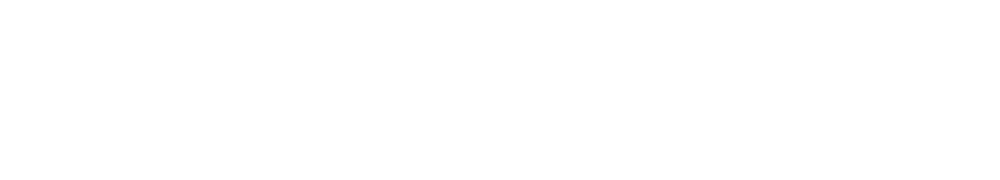

<IPython.core.display.Javascript object>


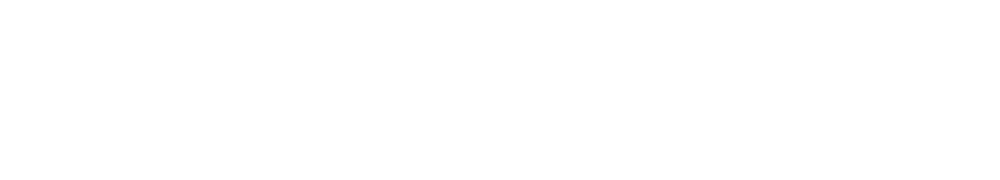

base: 0.589859560759786
optimum: 0.6808885221301524
% improvement: 15


<IPython.core.display.Javascript object>


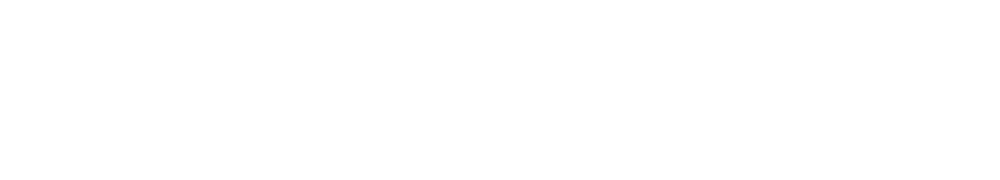

<IPython.core.display.Javascript object>


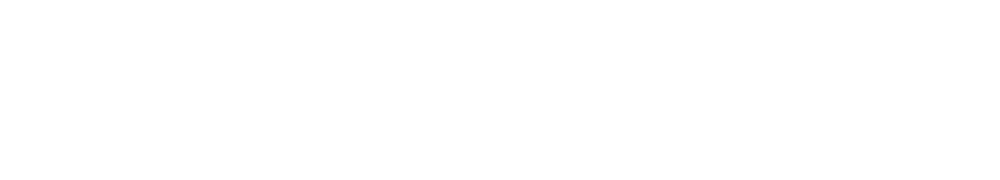

base: 0.6030403603385586
optimum: 0.6768846304327572
% improvement: 12


<IPython.core.display.Javascript object>


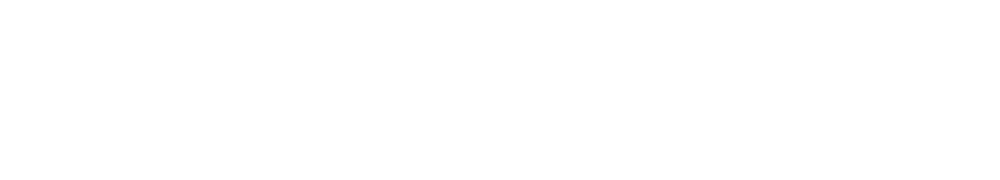

<IPython.core.display.Javascript object>


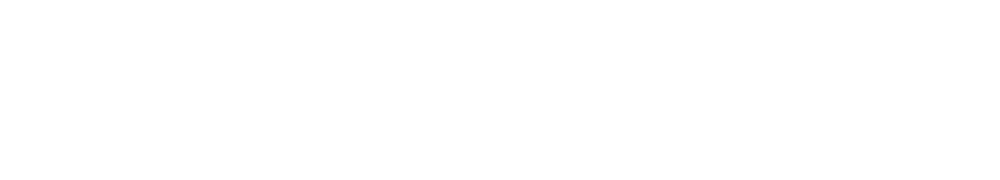

base: 0.6082531020084375
optimum: 0.6782174587829709
% improvement: 11


<IPython.core.display.Javascript object>


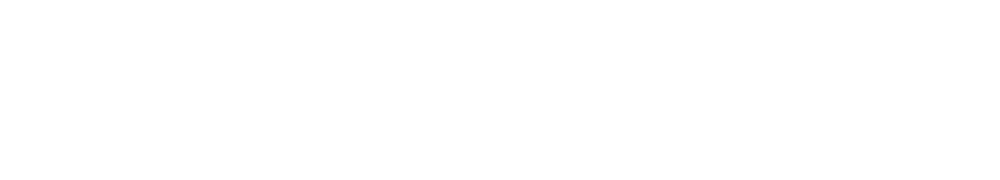

<IPython.core.display.Javascript object>


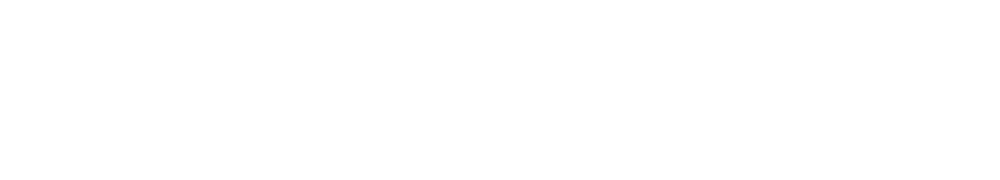

base: 0.5784719104881255
optimum: 0.6786134239919659
% improvement: 17


<IPython.core.display.Javascript object>


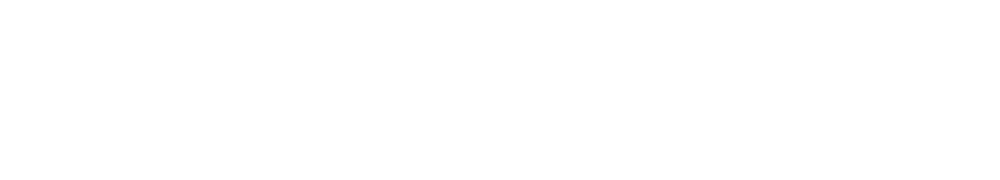

<IPython.core.display.Javascript object>


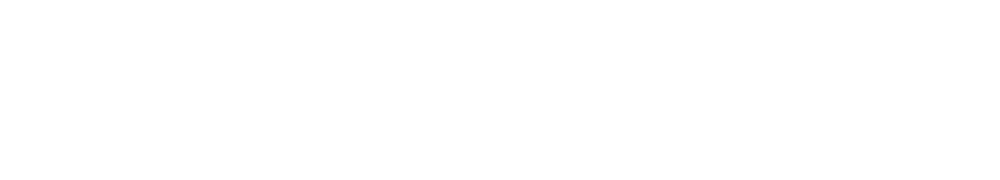

base: 0.592888542639119
optimum: 0.6855449855941712
% improvement: 15


<IPython.core.display.Javascript object>


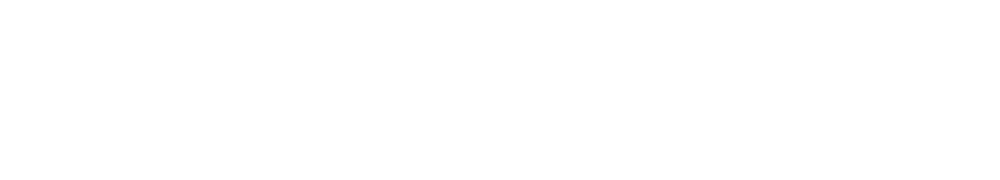

<IPython.core.display.Javascript object>


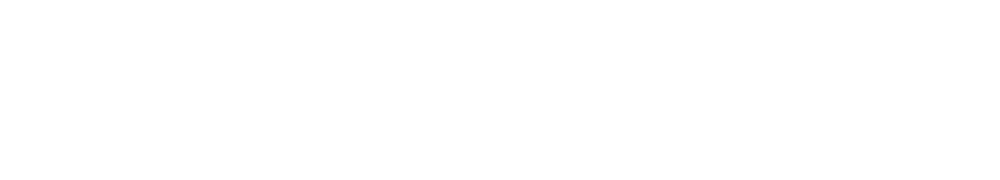

base: 0.5669858882964655
optimum: 0.6690394117285405
% improvement: 17


/data/ad181/RemoteDir/multilevel_ppo/utils/plot_functions.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,ctrl_steps,figsize=(round(figsize_scale*aspect)*ctrl_steps,figsize_scale) )


<IPython.core.display.Javascript object>


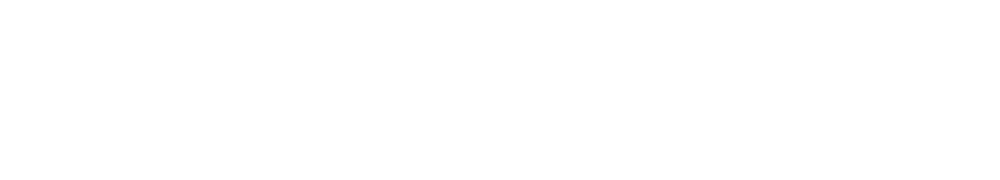

<IPython.core.display.Javascript object>


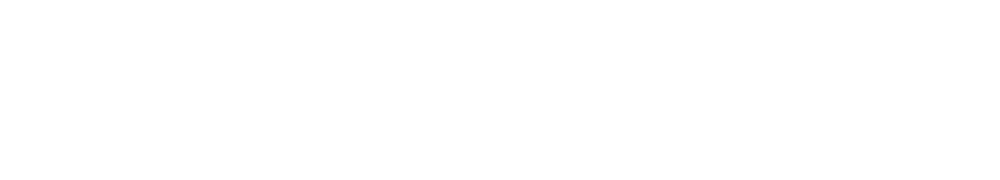

base: 0.5704666138757593
optimum: 0.6787902441157263
% improvement: 18


<IPython.core.display.Javascript object>


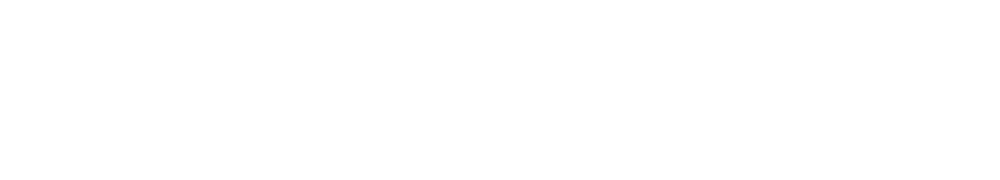

<IPython.core.display.Javascript object>


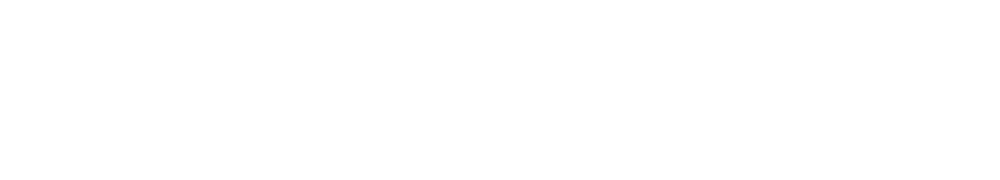

base: 0.6182540873977088
optimum: 0.6829471001178902
% improvement: 10


<IPython.core.display.Javascript object>


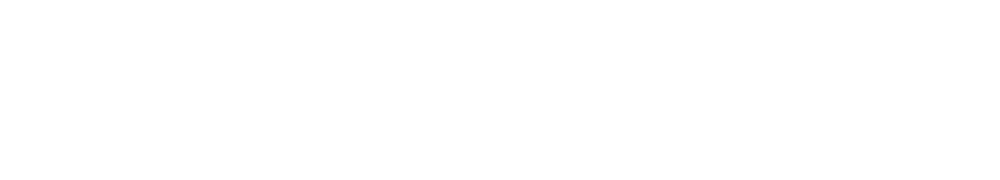

<IPython.core.display.Javascript object>


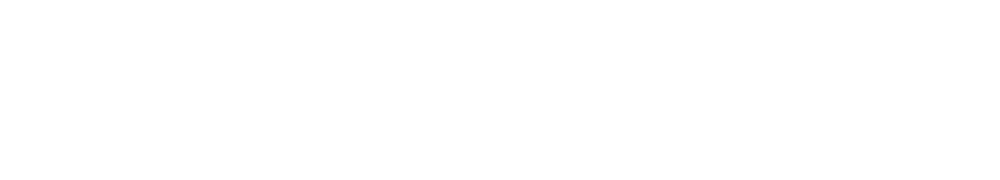

base: 0.57760419454893
optimum: 0.678800890333507
% improvement: 17


<IPython.core.display.Javascript object>


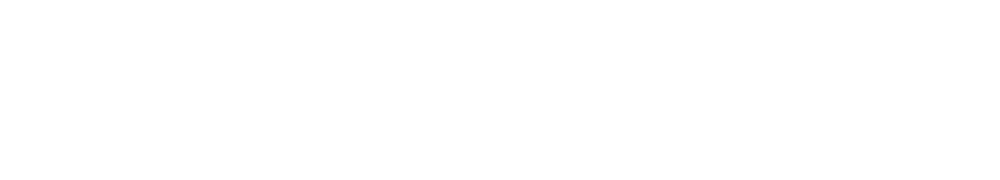

<IPython.core.display.Javascript object>


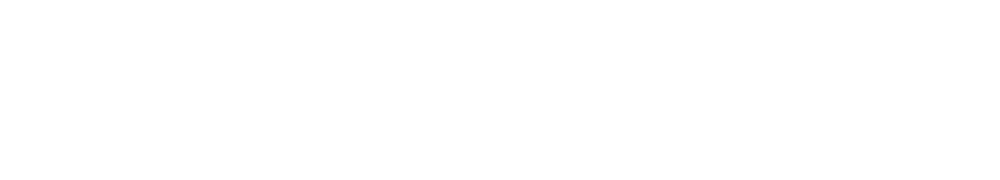

base: 0.592500083870786
optimum: 0.6827602703014314
% improvement: 15


<IPython.core.display.Javascript object>


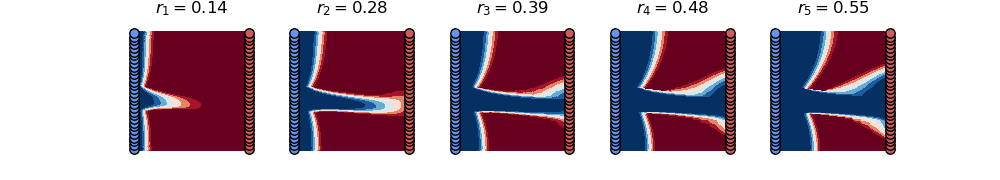

<IPython.core.display.Javascript object>


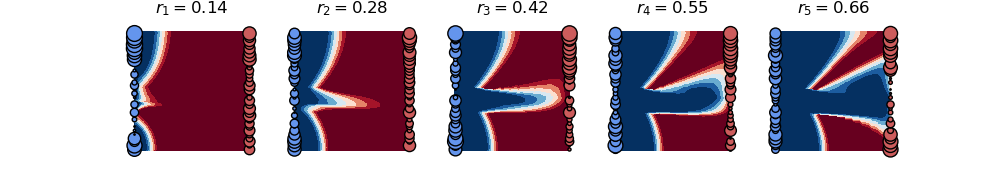

base: 0.5466160596493465
optimum: 0.661203045493738
% improvement: 20


<IPython.core.display.Javascript object>


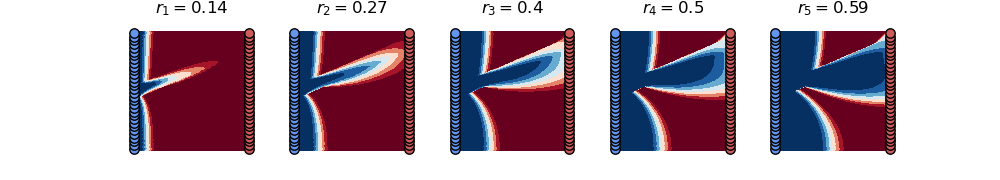

<IPython.core.display.Javascript object>


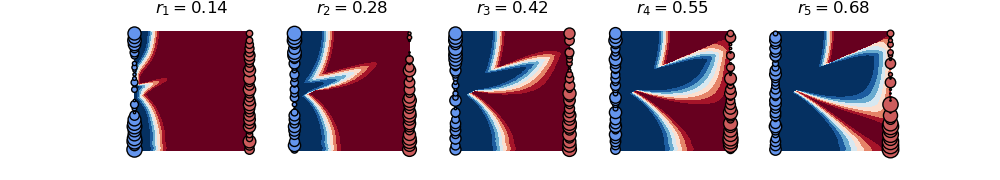

base: 0.5866627576170067
optimum: 0.6770651590758672
% improvement: 15


In [5]:
base_array, opt_array = [], []

for idx in rl_indices:
    
    env = envs[idx]
    
    base_action = np.ones((env.ressim_params.terminal_step, env.action_space.shape[0]))
    states, actions, rewards = eval_actions(env, base_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                       s_max=0.8, s_min=0.2,
                       marker_size_ref=10, figsize_scale=1.8, show_wells=True)
    base_reward = sum(rewards)
    fig.savefig(img_dir+'/base_'+str(idx)+'.pdf')

    opt_action = np.load(opt_dir+'/ck_argmax_'+str(idx)+'.npy').reshape(env.ressim_params.terminal_step, -1)
    states, actions, rewards = eval_actions(env, opt_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                           s_max=0.8, s_min=0.2,
                           marker_size_ref=10, figsize_scale=1.8, 
                           show_wells=True)
    opt_reward = sum(rewards)
    fig.savefig(img_dir+'/opt_'+str(idx)+'.pdf')
    
    base_array.append(base_reward)
    opt_array.append(opt_reward)
    
    print(f'base: {base_reward}')
    print(f'optimum: {opt_reward}')
    print(f'% improvement: {int(100*np.abs(base_reward-opt_reward)/base_reward)}')  

<IPython.core.display.Javascript object>


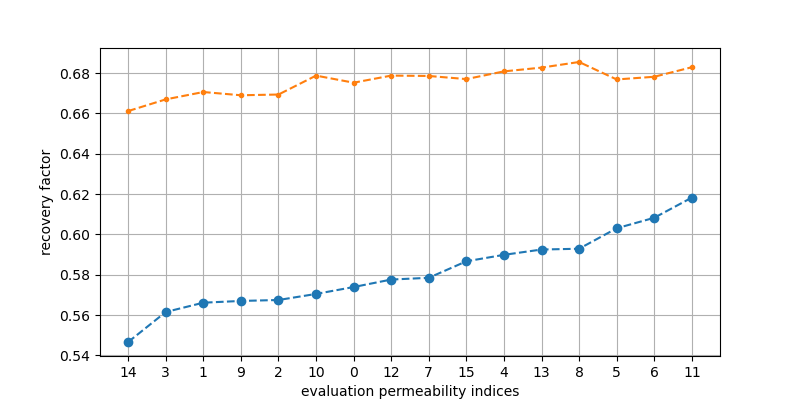

0.6758181627260242


In [6]:
fig, axs = plt.subplots(1,1,figsize=(8,4) )

sort_indices = np.argsort(base_array)

axs.plot(np.array(base_array)[sort_indices], 'o--')
axs.plot(np.array(opt_array)[sort_indices], '.--')
axs.set_ylabel('recovery factor')
axs.set_xlabel('evaluation permeability indices')
axs.set_xticks(rl_indices)
axs.set_xticklabels(sort_indices)
axs.grid('on')
plt.show()

print(np.mean(opt_array))